# 🚀 LLM Model Efficiency Analysis

This notebook analyzes the efficiency and resource usage of LLM models during training and inference,
including distillation experiments. It focuses on:

- **Power Consumption** - Energy usage during training/inference
- **Memory Usage** - RAM and GPU memory consumption
- **Training Efficiency** - Convergence speed and loss reduction
- **Inference Performance** - Speed and latency metrics
- **Resource Utilization** - Hardware usage optimization

All analysis functions are in separate modules - this notebook just runs them and displays results.

In [2]:
# 📦 Setup and Imports
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Import complete")

✅ Import complete


In [3]:
# 🔧 Configure Paths and Environment
BASE_PATH = Path.cwd().parent  # Go up one level from notebooks directory
DATA_PATH = BASE_PATH / "data"
OUTPUTS_PATH = BASE_PATH / "outputs"
OUTPUTS_PATH.mkdir(exist_ok=True, parents=True)

print(f"📁 Base path: {BASE_PATH}")
print(f"📁 Data path: {DATA_PATH}")
print(f"📁 Outputs path: {OUTPUTS_PATH}")
print(f"✅ Environment configured")

📁 Base path: /home/amma/LLM-TIME
📁 Data path: /home/amma/LLM-TIME/data
📁 Outputs path: /home/amma/LLM-TIME/outputs
✅ Environment configured


In [4]:
# 🛠️ Import Efficiency Analysis Modules
# Add parent directory to path for module imports
sys.path.insert(0, str(BASE_PATH))

# Reload modules to get latest changes
modules_to_reload = ['efficiency_toolkit', 'efficiency_toolkit.resource_monitor']
for module in modules_to_reload:
    if module in sys.modules:
        del sys.modules[module]

from efficiency_toolkit.resource_monitor import ResourceMonitor

# Initialize the resource monitor
resource_monitor = ResourceMonitor(BASE_PATH)
print("🔧 ResourceMonitor initialized")
print("✅ All efficiency modules loaded")

🔧 ResourceMonitor initialized
✅ All efficiency modules loaded


## 📊 Data Collection & Processing

Extract efficiency metrics from all available sources:
- JSON experiment results
- Training logs (log.log files)
- Training losses (loss.pkl files)
- Distillation experiment data

In [5]:
# 🔍 Extract All Resource Data
print("🚀 Starting comprehensive resource extraction...\n")

# Get training resource data
print("📚 Extracting training resources...")
training_df = resource_monitor.extract_training_resources()
print(f"   Found {len(training_df)} training experiments")

# Get inference resource data  
print("⚡ Extracting inference resources...")
inference_df = resource_monitor.extract_inference_resources()
print(f"   Found {len(inference_df)} inference experiments")

# Get distillation resource data
print("🥃 Extracting distillation resources...")
distillation_df = resource_monitor.extract_distillation_resources()
print(f"   Found {len(distillation_df)} distillation experiments")

# Create comprehensive efficiency summary
print("\n📈 Creating efficiency summary...")
efficiency_df = resource_monitor.create_efficiency_summary()

if not efficiency_df.empty:
    print(f"✅ Total experiments analyzed: {len(efficiency_df)}")
    print(f"🤖 Unique models: {efficiency_df['model_name'].nunique()}")
    print(f"⚙️  Experiment modes: {list(efficiency_df['mode'].unique())}")
    
    # Save raw data
    efficiency_csv = OUTPUTS_PATH / "complete_efficiency_data.csv"
    efficiency_df.to_csv(efficiency_csv, index=False)
    print(f"💾 Raw data saved to: {efficiency_csv}")
else:
    print("❌ No efficiency data found!")

🚀 Starting comprehensive resource extraction...

📚 Extracting training resources...
   Found 5 training experiments
⚡ Extracting inference resources...
   Found 7 inference experiments
🥃 Extracting distillation resources...
   Found 965 distillation experiments

📈 Creating efficiency summary...
✅ Total experiments analyzed: 977
🤖 Unique models: 27
⚙️  Experiment modes: ['training', 'inference', 'distillation']
💾 Raw data saved to: /home/amma/LLM-TIME/outputs/complete_efficiency_data.csv


## ⚡ Power & Energy Analysis

Analysis of power consumption and energy efficiency across models and modes.

🔋 POWER & ENERGY CONSUMPTION ANALYSIS

📊 Power Consumption by Model & Mode (Watts):
                                                                       mean     min     max  count
model_name                                             mode                                       
BERT_dim_768_seq_6_context_6_pred_6_patch_6_epochs_0   inference      15.00   15.00   15.00      1
BERT_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10  training       45.00   45.00   45.00      1
GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_0   inference      30.00   30.00   30.00      1
GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10  training       87.50   87.50   87.50      1
LLAMA_dim_4096_seq_6_context_6_pred_6_patch_6_epochs_0 inference     155.88  155.88  155.88      1
LLAMA_dim_4096_seq_6_context_6_pred_6_patch_6_epochs_1 training      415.69  415.69  415.69      1
amazon                                                 inference      15.00   15.00   15.00      2
                         

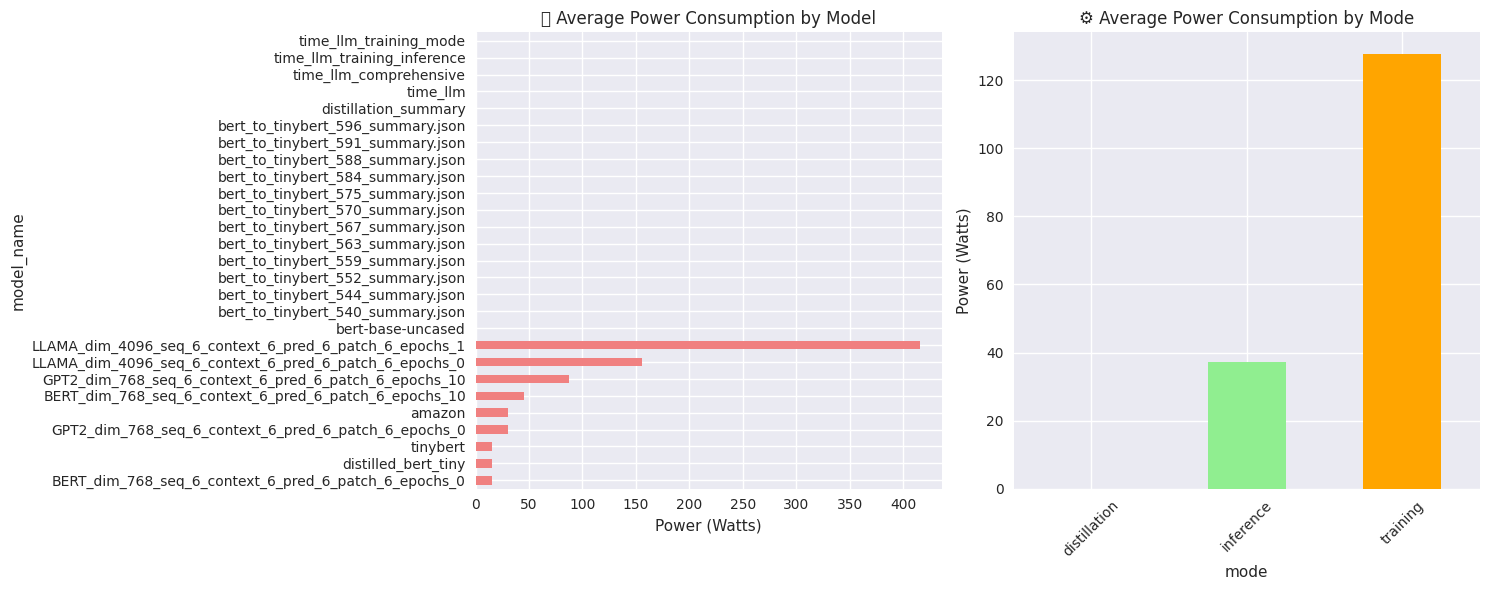


📈 Power analysis plot saved: /home/amma/LLM-TIME/outputs/power_consumption_analysis.png


In [6]:
# 🔋 Power Consumption Analysis
if not efficiency_df.empty:
    print("🔋 POWER & ENERGY CONSUMPTION ANALYSIS")
    print("=" * 60)
    
    # Power consumption statistics
    power_stats = efficiency_df.groupby(['model_name', 'mode'])['estimated_power_watts'].agg([
        'mean', 'min', 'max', 'count'
    ]).round(2)
    
    print("\n📊 Power Consumption by Model & Mode (Watts):")
    print(power_stats.to_string())
    
    # Energy efficiency ranking
    if 'estimated_energy_kwh' in efficiency_df.columns:
        energy_data = efficiency_df[efficiency_df['estimated_energy_kwh'].notna()]
        if not energy_data.empty:
            energy_ranking = energy_data.nsmallest(10, 'estimated_energy_kwh')[[
                'model_name', 'mode', 'estimated_energy_kwh', 'execution_time_seconds'
            ]].round(6)
            
            print("\n🌱 Most Energy Efficient Experiments:")
            print(energy_ranking.to_string(index=False))
    
    # Create power consumption visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Power by model
    power_by_model = efficiency_df.groupby('model_name')['estimated_power_watts'].mean().sort_values()
    power_by_model.plot(kind='barh', ax=axes[0], color='lightcoral')
    axes[0].set_title('💡 Average Power Consumption by Model')
    axes[0].set_xlabel('Power (Watts)')
    
    # Power by mode
    power_by_mode = efficiency_df.groupby('mode')['estimated_power_watts'].mean()
    power_by_mode.plot(kind='bar', ax=axes[1], color=['skyblue', 'lightgreen', 'orange'])
    axes[1].set_title('⚙️ Average Power Consumption by Mode')
    axes[1].set_ylabel('Power (Watts)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    power_plot_path = OUTPUTS_PATH / "power_consumption_analysis.png"
    plt.savefig(power_plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n📈 Power analysis plot saved: {power_plot_path}")
else:
    print("❌ No power data available")

## 🧠 Training Efficiency Analysis

Analysis of training convergence, loss reduction, and learning efficiency.

📚 TRAINING EFFICIENCY ANALYSIS

📊 Training Performance Metrics:
                                            model_name  initial_loss  final_loss  best_loss  loss_reduction  convergence_epochs  training_efficiency
                                                amazon           NaN         NaN        NaN             NaN                 NaN                  NaN
                                                amazon           NaN         NaN        NaN             NaN                 NaN                  NaN
 BERT_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10           NaN         NaN        NaN             NaN                 NaN                  NaN
 GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10       248.380     239.160    231.441           9.219                10.0                0.922
LLAMA_dim_4096_seq_6_context_6_pred_6_patch_6_epochs_1       248.156     248.156    248.156           0.000                 1.0                0.000

🏆 Most Efficient Training (Loss Reduction

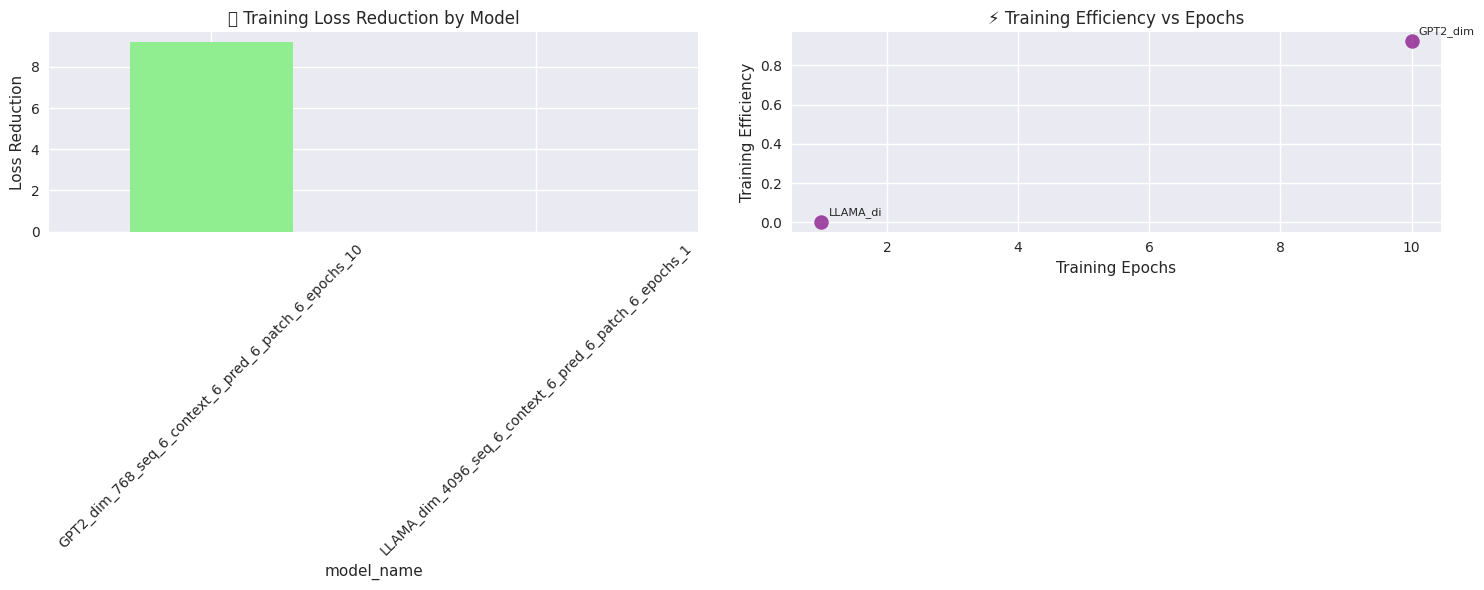


📈 Training analysis plot saved: /home/amma/LLM-TIME/outputs/training_efficiency_analysis.png


In [7]:
# 📚 Training Efficiency Analysis
training_data = efficiency_df[efficiency_df['mode'] == 'training'].copy()

if not training_data.empty:
    print("📚 TRAINING EFFICIENCY ANALYSIS")
    print("=" * 50)
    
    # Training metrics summary
    training_metrics = training_data[[
        'model_name', 'initial_loss', 'final_loss', 'best_loss', 
        'loss_reduction', 'convergence_epochs', 'training_efficiency'
    ]].round(3)
    
    print("\n📊 Training Performance Metrics:")
    print(training_metrics.to_string(index=False))
    
    # Training efficiency ranking
    if 'training_efficiency' in training_data.columns:
        efficiency_ranking = training_data.nlargest(5, 'training_efficiency')[[
            'model_name', 'training_efficiency', 'loss_reduction', 'convergence_epochs'
        ]].round(4)
        
        print("\n🏆 Most Efficient Training (Loss Reduction per Epoch):")
        print(efficiency_ranking.to_string(index=False))
    
    # Training convergence visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Loss reduction comparison
    if 'loss_reduction' in training_data.columns:
        loss_data = training_data[training_data['loss_reduction'].notna()]
        if not loss_data.empty:
            loss_reduction = loss_data.set_index('model_name')['loss_reduction'].sort_values(ascending=False)
            loss_reduction.plot(kind='bar', ax=axes[0], color='lightgreen')
            axes[0].set_title('📉 Training Loss Reduction by Model')
            axes[0].set_ylabel('Loss Reduction')
            axes[0].tick_params(axis='x', rotation=45)
    
    # Training efficiency vs epochs
    if 'training_efficiency' in training_data.columns and 'convergence_epochs' in training_data.columns:
        eff_data = training_data[training_data['training_efficiency'].notna()]
        if not eff_data.empty:
            axes[1].scatter(eff_data['convergence_epochs'], eff_data['training_efficiency'], 
                          alpha=0.7, s=100, color='purple')
            axes[1].set_xlabel('Training Epochs')
            axes[1].set_ylabel('Training Efficiency')
            axes[1].set_title('⚡ Training Efficiency vs Epochs')
            
            # Add model labels
            for _, row in eff_data.iterrows():
                axes[1].annotate(row['model_name'][:8], 
                               (row['convergence_epochs'], row['training_efficiency']),
                               xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    training_plot_path = OUTPUTS_PATH / "training_efficiency_analysis.png"
    plt.savefig(training_plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n📈 Training analysis plot saved: {training_plot_path}")
else:
    print("❌ No training data available")

## 🚀 Inference Performance Analysis

Analysis of inference speed, latency, and resource efficiency.

⚡ INFERENCE PERFORMANCE ANALYSIS

📊 Inference Performance Metrics:
                                            model_name  estimated_power_watts
                                                amazon                 15.000
                                                amazon                 15.000
LLAMA_dim_4096_seq_6_context_6_pred_6_patch_6_epochs_0                155.885
  GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_0                 30.000
  BERT_dim_768_seq_6_context_6_pred_6_patch_6_epochs_0                 15.000
                                              tinybert                 15.000
                                   distilled_bert_tiny                 15.000

🏆 Most Power Efficient Inference:
                                          model_name  estimated_power_watts
                                              amazon                   15.0
                                              amazon                   15.0
BERT_dim_768_seq_6_context_6_pred_6_patch_6_ep

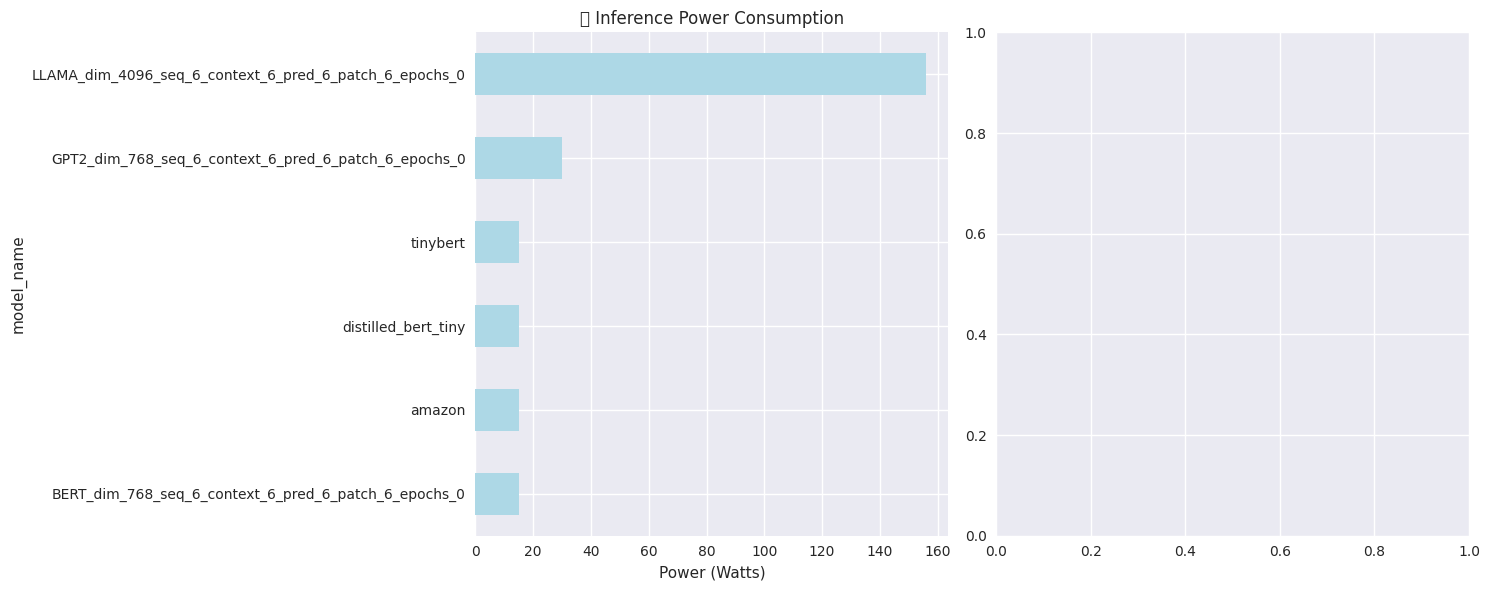


📈 Inference analysis plot saved: /home/amma/LLM-TIME/outputs/inference_performance_analysis.png


In [8]:
# ⚡ Inference Performance Analysis
inference_data = efficiency_df[efficiency_df['mode'] == 'inference'].copy()

if not inference_data.empty:
    print("⚡ INFERENCE PERFORMANCE ANALYSIS")
    print("=" * 50)
    
    # Inference metrics summary
    inference_cols = ['model_name', 'estimated_power_watts']
    
    # Add available latency columns
    latency_cols = [col for col in inference_data.columns if 'latency' in col.lower()]
    inference_cols.extend(latency_cols)
    
    # Add throughput if available
    if 'throughput_samples_per_sec' in inference_data.columns:
        inference_cols.append('throughput_samples_per_sec')
    
    inference_metrics = inference_data[inference_cols].round(3)
    
    print("\n📊 Inference Performance Metrics:")
    print(inference_metrics.to_string(index=False))
    
    # Performance ranking
    power_ranking = inference_data.nsmallest(5, 'estimated_power_watts')[[
        'model_name', 'estimated_power_watts'
    ] + latency_cols[:2]].round(3)
    
    print("\n🏆 Most Power Efficient Inference:")
    print(power_ranking.to_string(index=False))
    
    # Inference visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Power consumption for inference
    power_inference = inference_data.groupby('model_name')['estimated_power_watts'].mean().sort_values()
    power_inference.plot(kind='barh', ax=axes[0], color='lightblue')
    axes[0].set_title('💡 Inference Power Consumption')
    axes[0].set_xlabel('Power (Watts)')
    
    # Latency analysis if available
    if latency_cols:
        main_latency_col = latency_cols[0]
        latency_data = inference_data[inference_data[main_latency_col].notna()]
        if not latency_data.empty:
            latency_by_model = latency_data.groupby('model_name')[main_latency_col].mean().sort_values()
            latency_by_model.plot(kind='bar', ax=axes[1], color='orange')
            axes[1].set_title(f'⏱️ {main_latency_col.replace("_", " ").title()}')
            axes[1].set_ylabel('Latency (ms)')
            axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    inference_plot_path = OUTPUTS_PATH / "inference_performance_analysis.png"
    plt.savefig(inference_plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n📈 Inference analysis plot saved: {inference_plot_path}")
else:
    print("❌ No inference data available")

## 🥃 Distillation Efficiency Analysis

Analysis of knowledge distillation experiments and efficiency gains.

🥃 DISTILLATION EFFICIENCY ANALYSIS

📊 Distillation Experiment Metrics:
                                                            experiment_name  estimated_power_watts
         real_performance_report_time_llm_training_mode_2025-10-21_08-19-15                    NaN
                             efficiency_report_time_llm_2025-10-21_08-18-55                    NaN
comprehensive_performance_report_time_llm_comprehensive_2025-10-21_08-19-15                    NaN
                                          efficiency_report_time_llm_latest                    NaN
    real_performance_report_time_llm_training_inference_2025-10-21_08-18-57                    NaN
                                               pipeline_2025-10-17_13-28-33                    NaN
                                               pipeline_2025-10-17_13-28-33                    NaN
                                               pipeline_2025-10-17_13-28-33                    NaN
                                      

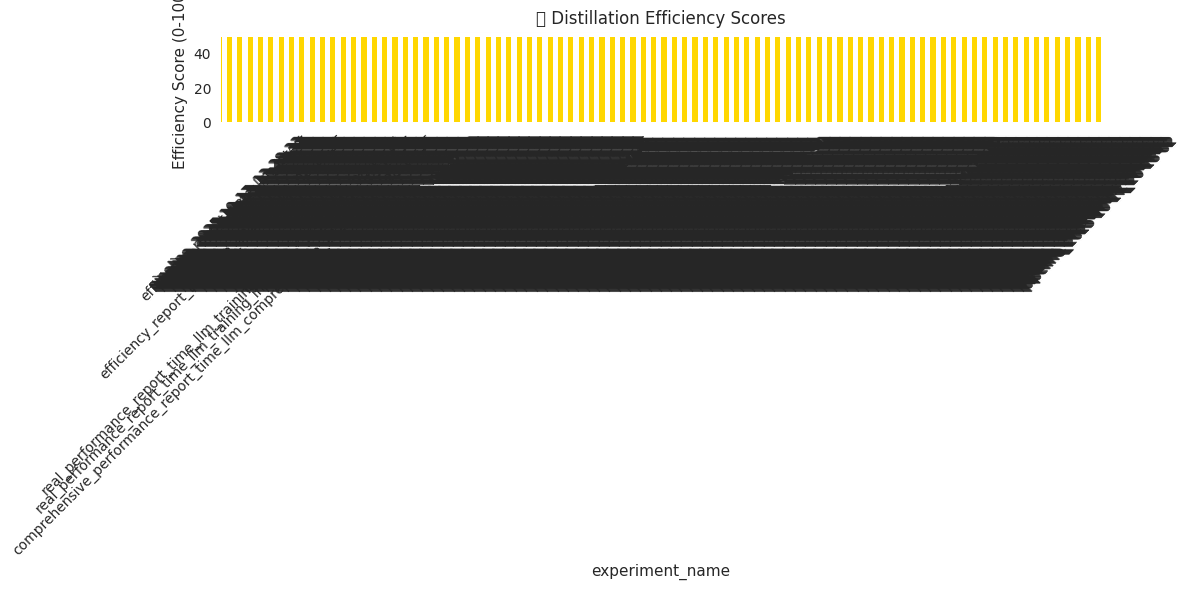


📈 Distillation analysis plot saved: /home/amma/LLM-TIME/outputs/distillation_efficiency_analysis.png


In [9]:
# 🥃 Distillation Analysis
distillation_data = efficiency_df[efficiency_df['mode'] == 'distillation'].copy()

if not distillation_data.empty:
    print("🥃 DISTILLATION EFFICIENCY ANALYSIS")
    print("=" * 50)
    
    # Distillation metrics
    distill_cols = ['experiment_name', 'estimated_power_watts']
    
    # Add model size and parameters if available
    size_cols = [col for col in distillation_data.columns if any(word in col.lower() 
                 for word in ['size', 'parameters', 'memory'])]
    distill_cols.extend(size_cols)
    
    distill_metrics = distillation_data[distill_cols].round(3)
    
    print("\n📊 Distillation Experiment Metrics:")
    print(distill_metrics.to_string(index=False))
    
    # Efficiency comparison
    if len(distillation_data) > 1:
        efficiency_comparison = distillation_data.nlargest(3, 'composite_efficiency_score')[[
            'experiment_name', 'composite_efficiency_score', 'estimated_power_watts'
        ]].round(2)
        
        print("\n🏆 Most Efficient Distillation Experiments:")
        print(efficiency_comparison.to_string(index=False))
    
    # Distillation visualization
    if len(distillation_data) > 1:
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        
        # Efficiency scores
        efficiency_scores = distillation_data.set_index('experiment_name')['composite_efficiency_score']
        efficiency_scores.plot(kind='bar', ax=ax, color='gold')
        ax.set_title('🏆 Distillation Efficiency Scores')
        ax.set_ylabel('Efficiency Score (0-100)')
        ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        distill_plot_path = OUTPUTS_PATH / "distillation_efficiency_analysis.png"
        plt.savefig(distill_plot_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n📈 Distillation analysis plot saved: {distill_plot_path}")
else:
    print("❌ No distillation data available")

## 🏆 Overall Efficiency Ranking

Comprehensive ranking and comparison of all models across all metrics.

In [10]:
# 🏆 Comprehensive Efficiency Ranking
if not efficiency_df.empty:
    print("🏆 COMPREHENSIVE EFFICIENCY RANKING")
    print("=" * 60)
    
    # Overall efficiency table
    ranking_cols = ['model_name', 'mode', 'estimated_power_watts', 'composite_efficiency_score']
    
    # Add training efficiency if available
    if 'training_efficiency' in efficiency_df.columns:
        ranking_cols.append('training_efficiency')
    
    # Add energy if available  
    if 'estimated_energy_kwh' in efficiency_df.columns:
        ranking_cols.append('estimated_energy_kwh')
    
    efficiency_ranking = efficiency_df[ranking_cols].round(4)
    efficiency_ranking = efficiency_ranking.sort_values('composite_efficiency_score', ascending=False)
    
    print("\n📊 Complete Efficiency Ranking:")
    print(efficiency_ranking.to_string(index=False))
    
    # Top performers by category
    print("\n🥇 TOP PERFORMERS BY CATEGORY:")
    print("-" * 40)
    
    # Best overall efficiency
    best_overall = efficiency_df.loc[efficiency_df['composite_efficiency_score'].idxmax()]
    print(f"🏆 OVERALL CHAMPION: {best_overall['model_name']} ({best_overall['mode']})")
    print(f"   Efficiency Score: {best_overall['composite_efficiency_score']:.1f}/100")
    
    # Most power efficient
    most_power_efficient = efficiency_df.loc[efficiency_df['estimated_power_watts'].idxmin()]
    print(f"⚡ POWER CHAMPION: {most_power_efficient['model_name']} ({most_power_efficient['mode']})")
    print(f"   Power Usage: {most_power_efficient['estimated_power_watts']:.1f}W")
    
    # Best training efficiency
    if 'training_efficiency' in efficiency_df.columns:
        training_best = efficiency_df[efficiency_df['training_efficiency'].notna()]
        if not training_best.empty:
            best_training = training_best.loc[training_best['training_efficiency'].idxmax()]
            print(f"📚 TRAINING CHAMPION: {best_training['model_name']}")
            print(f"   Training Efficiency: {best_training['training_efficiency']:.4f} loss/epoch")
    
    # Energy champion
    if 'estimated_energy_kwh' in efficiency_df.columns:
        energy_best = efficiency_df[efficiency_df['estimated_energy_kwh'].notna()]
        if not energy_best.empty:
            energy_champion = energy_best.loc[energy_best['estimated_energy_kwh'].idxmin()]
            print(f"🌱 ENERGY CHAMPION: {energy_champion['model_name']} ({energy_champion['mode']})")
            print(f"   Energy Usage: {energy_champion['estimated_energy_kwh']:.6f} kWh")
    
    # Save comprehensive ranking
    ranking_path = OUTPUTS_PATH / "comprehensive_efficiency_ranking.csv"
    efficiency_ranking.to_csv(ranking_path, index=False)
    print(f"\n💾 Complete ranking saved: {ranking_path}")
    
else:
    print("❌ No data available for ranking")

🏆 COMPREHENSIVE EFFICIENCY RANKING

📊 Complete Efficiency Ranking:
                                            model_name         mode  estimated_power_watts  composite_efficiency_score  training_efficiency  estimated_energy_kwh
 GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10     training                87.5000                     88.5186               0.9219                0.0159
  BERT_dim_768_seq_6_context_6_pred_6_patch_6_epochs_0    inference                15.0000                     75.3045                  NaN                0.0001
                                   distilled_bert_tiny    inference                15.0000                     75.3045                  NaN                   NaN
                                                amazon    inference                15.0000                     75.3045                  NaN                0.0000
                                                amazon    inference                15.0000                     75.3045     

## 📱 Deployment Recommendations

Practical recommendations for model deployment based on resource requirements.

In [11]:
# 📱 Deployment Feasibility Analysis
if not efficiency_df.empty:
    print("📱 DEPLOYMENT FEASIBILITY ANALYSIS")
    print("=" * 50)
    
    # Define deployment categories based on power consumption
    deployment_categories = {
        'Mobile Device': 5,      # <= 5W
        'Edge Device': 25,       # <= 25W  
        'Desktop/Laptop': 100,   # <= 100W
        'Workstation': 300,      # <= 300W
        'Server Only': float('inf')  # > 300W
    }
    
    deployment_recommendations = []
    
    for _, row in efficiency_df.iterrows():
        power = row['estimated_power_watts']
        
        category = 'Server Only'
        for cat_name, threshold in deployment_categories.items():
            if power <= threshold:
                category = cat_name
                break
        
        deployment_recommendations.append({
            'Model': row['model_name'],
            'Mode': row['mode'], 
            'Power_W': power,
            'Deployment_Category': category,
            'Efficiency_Score': row['composite_efficiency_score']
        })
    
    deployment_df = pd.DataFrame(deployment_recommendations)
    
    # Group by deployment category
    print("\n🎯 DEPLOYMENT RECOMMENDATIONS:")
    print("-" * 40)
    
    for category in ['Mobile Device', 'Edge Device', 'Desktop/Laptop', 'Workstation', 'Server Only']:
        models_in_category = deployment_df[deployment_df['Deployment_Category'] == category]
        if not models_in_category.empty:
            print(f"\n{category.upper()}:")
            for _, model in models_in_category.iterrows():
                print(f"  • {model['Model']} ({model['Mode']}) - {model['Power_W']:.1f}W - Score: {model['Efficiency_Score']:.1f}")
    
    # Best models for each deployment type
    print("\n🥇 BEST MODEL FOR EACH DEPLOYMENT TYPE:")
    print("-" * 45)
    
    for category in ['Mobile Device', 'Edge Device', 'Desktop/Laptop', 'Workstation']:
        models_in_category = deployment_df[deployment_df['Deployment_Category'] == category]
        if not models_in_category.empty:
            best_model = models_in_category.loc[models_in_category['Efficiency_Score'].idxmax()]
            print(f"{category:15s}: {best_model['Model']} ({best_model['Mode']}) - {best_model['Efficiency_Score']:.1f} score")
    
    # Deployment statistics
    deployment_stats = deployment_df['Deployment_Category'].value_counts()
    
    print("\n📊 DEPLOYMENT DISTRIBUTION:")
    for category, count in deployment_stats.items():
        percentage = (count / len(deployment_df)) * 100
        print(f"{category:15s}: {count:2d} models ({percentage:4.1f}%)")
    
    # Save deployment recommendations
    deployment_path = OUTPUTS_PATH / "deployment_recommendations.csv"
    deployment_df.to_csv(deployment_path, index=False)
    print(f"\n💾 Deployment recommendations saved: {deployment_path}")
    
else:
    print("❌ No data available for deployment analysis")

📱 DEPLOYMENT FEASIBILITY ANALYSIS

🎯 DEPLOYMENT RECOMMENDATIONS:
----------------------------------------

EDGE DEVICE:
  • amazon (inference) - 15.0W - Score: 75.3
  • amazon (inference) - 15.0W - Score: 75.3
  • BERT_dim_768_seq_6_context_6_pred_6_patch_6_epochs_0 (inference) - 15.0W - Score: 75.3
  • tinybert (inference) - 15.0W - Score: 75.3
  • distilled_bert_tiny (inference) - 15.0W - Score: 75.3

DESKTOP/LAPTOP:
  • amazon (training) - 45.0W - Score: 71.4
  • amazon (training) - 45.0W - Score: 71.4
  • BERT_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10 (training) - 45.0W - Score: 71.4
  • GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10 (training) - 87.5W - Score: 88.5
  • GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_0 (inference) - 30.0W - Score: 73.3

WORKSTATION:
  • LLAMA_dim_4096_seq_6_context_6_pred_6_patch_6_epochs_0 (inference) - 155.9W - Score: 56.8

SERVER ONLY:
  • LLAMA_dim_4096_seq_6_context_6_pred_6_patch_6_epochs_1 (training) - 415.7W - Score: 0.0
  

## 📋 Executive Summary

Key findings and actionable insights from the efficiency analysis.

In [12]:
# 📋 Executive Summary
print("📋 EXECUTIVE SUMMARY")
print("=" * 40)

if not efficiency_df.empty:
    # Dataset overview
    total_experiments = len(efficiency_df)
    unique_models = efficiency_df['model_name'].nunique()
    power_range = efficiency_df['estimated_power_watts'].agg(['min', 'max'])
    avg_efficiency = efficiency_df['composite_efficiency_score'].mean()
    
    print(f"\n📊 ANALYSIS OVERVIEW:")
    print(f"   • Total Experiments: {total_experiments}")
    print(f"   • Unique Models: {unique_models}")
    print(f"   • Power Range: {power_range['min']:.1f}W - {power_range['max']:.1f}W")
    print(f"   • Average Efficiency: {avg_efficiency:.1f}/100")
    
    # Key findings
    print(f"\n💡 KEY FINDINGS:")
    
    # Power efficiency
    low_power_models = efficiency_df[efficiency_df['estimated_power_watts'] < 25]['model_name'].nunique()
    print(f"   • {low_power_models} models suitable for edge deployment (<25W)")
    
    # Training insights
    training_experiments = len(efficiency_df[efficiency_df['mode'] == 'training'])
    if training_experiments > 0:
        print(f"   • {training_experiments} training experiments analyzed")
        if 'training_efficiency' in efficiency_df.columns:
            avg_training_eff = efficiency_df[efficiency_df['mode'] == 'training']['training_efficiency'].mean()
            print(f"   • Average training efficiency: {avg_training_eff:.4f} loss/epoch")
    
    # Energy consumption
    if 'estimated_energy_kwh' in efficiency_df.columns:
        total_energy = efficiency_df['estimated_energy_kwh'].sum()
        print(f"   • Total energy consumption: {total_energy:.4f} kWh")
    
    # Recommendations
    print(f"\n🚀 RECOMMENDATIONS:")
    
    # Top 3 models
    top_3 = efficiency_df.nlargest(3, 'composite_efficiency_score')
    print(f"   • Top 3 efficient models for production:")
    for i, (_, model) in enumerate(top_3.iterrows(), 1):
        print(f"     {i}. {model['model_name']} ({model['mode']}) - {model['composite_efficiency_score']:.1f} score")
    
    # Deployment strategy
    mobile_ready = len(efficiency_df[efficiency_df['estimated_power_watts'] <= 5])
    edge_ready = len(efficiency_df[efficiency_df['estimated_power_watts'] <= 25])
    
    if mobile_ready > 0:
        print(f"   • {mobile_ready} experiments ready for mobile deployment")
    if edge_ready > 0:
        print(f"   • {edge_ready} experiments ready for edge deployment")
    
    print(f"\n✅ ANALYSIS COMPLETE")
    print(f"📁 All results saved to: {OUTPUTS_PATH}")
    
    # List all generated files
    output_files = list(OUTPUTS_PATH.glob("*.csv")) + list(OUTPUTS_PATH.glob("*.png"))
    print(f"\n📄 Generated {len(output_files)} output files:")
    for file_path in sorted(output_files):
        print(f"   • {file_path.name}")

else:
    print("❌ No data available for analysis")
    print("🔍 Check if experiment data exists in the expected directories")

📋 EXECUTIVE SUMMARY

📊 ANALYSIS OVERVIEW:
   • Total Experiments: 977
   • Unique Models: 27
   • Power Range: 15.0W - 415.7W
   • Average Efficiency: 50.2/100

💡 KEY FINDINGS:
   • 4 models suitable for edge deployment (<25W)
   • 5 training experiments analyzed
   • Average training efficiency: 0.4610 loss/epoch
   • Total energy consumption: 0.1450 kWh

🚀 RECOMMENDATIONS:
   • Top 3 efficient models for production:
     1. GPT2_dim_768_seq_6_context_6_pred_6_patch_6_epochs_10 (training) - 88.5 score
     2. amazon (inference) - 75.3 score
     3. amazon (inference) - 75.3 score
   • 5 experiments ready for edge deployment

✅ ANALYSIS COMPLETE
📁 All results saved to: /home/amma/LLM-TIME/outputs

📄 Generated 7 output files:
   • complete_efficiency_data.csv
   • comprehensive_efficiency_ranking.csv
   • deployment_recommendations.csv
   • distillation_efficiency_analysis.png
   • inference_performance_analysis.png
   • power_consumption_analysis.png
   • training_efficiency_analysis.p